In [35]:
from sklearn.cluster import DBSCAN
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import normalization
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import support_file as sf
from sklearn.preprocessing import StandardScaler

Import data

In [36]:
data = pd.read_csv("Ecommerce Customers.csv")


data_norm = normalization.normalized_dataframe
#print(data_norm.info())

One-Hot-Kodierung

In [37]:
data_hot_clustering = sf.data_hot_clustering
#data_hot_clustering = pd.concat([data_norm, dummies], axis=1)


data_hot_clustering = data_hot_clustering[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent","State group", "HIGH","MEDIUM","LOW"]]
#print(data_hot_clustering.head(5))

# Standardized data
data_stand = data_hot_clustering[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent","State group","HIGH","MEDIUM","LOW"]]

con_feats = ["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]
scale = StandardScaler()

data_stand[con_feats] = scale.fit_transform(data_stand[con_feats])
print(data_stand.head())

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0             1.414336     0.636547         2.582317              0.515500   
1            -1.118662    -0.952137         0.253594             -0.936044   
2             1.225459     1.727593        -0.298830             -0.469302   
3             0.797362    -0.009458        -2.562691              1.959165   
4            -1.024748    -0.688189        -0.336661              1.131892   

   Yearly Amount Spent State group  HIGH  MEDIUM  LOW  
0             1.105305      MEDIUM     0       1    0  
1            -1.417115         LOW     0       0    1  
2             1.026716         LOW     0       0    1  
3             1.738679        HIGH     1       0    0  
4             0.249935      MEDIUM     0       1    0  


Layman's method

In [38]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_stand)
distances, indices = nbrs.kneighbors(data_stand)

distances = np.sort(distances, axis=0)

distances = distances[:,1]

plt.plot(distances)

ValueError: could not convert string to float: 'MEDIUM'

In [6]:
dbscan = DBSCAN(eps=1.6, min_samples=10)
clusters = dbscan.fit_predict(data_stand)
print(clusters)

[-1  0  0 -1  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0 -1  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1
 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0

Adding clusters to dataframe data_stand

In [7]:
list_clusters = []

for i in clusters:
    list_clusters.append(i)

data_stand["clusters"] = list_clusters
#print(data_stand.head())

Cluster 0 interpretation

In [8]:
cluster_0 = data_stand[data_stand["clusters"] == 0]
#print(cluster_0.head(5))

indices_cluster_0 = cluster_0.index
#print(indices_cluster_0)

cluster_0_df = []

for i in indices_cluster_0:
    cluster_0_df.append(data_hot_clustering.iloc[i])

#print(cluster_0_df)

cluster_0_df = pd.DataFrame(cluster_0_df)

#print(cluster_0_df.head())
#print(cluster_0_df.describe())

Cluster -1 interpretation

In [9]:
cluster_0 = data_stand[data_stand["clusters"] == 0]
#print(cluster_0.head(5))

indices_cluster_0 = cluster_0.index
#print(indices_cluster_0)

cluster_0_df = []

for i in indices_cluster_0:
    cluster_0_df.append(data_hot_clustering.iloc[i])

#print(cluster_0_df)

cluster_0_df = pd.DataFrame(cluster_0_df)

#print(cluster_0_df.head())
#print(cluster_0_df.describe())

Layman's method for only two dimensions

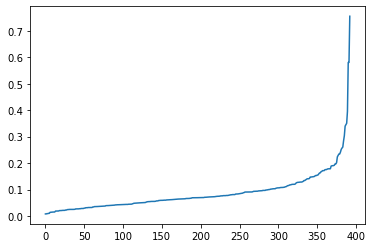

In [10]:
x = data_stand.iloc[:,[3,4]]

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

distances = np.sort(distances, axis=0)

distances = distances[:,1]

plt.plot(distances)

DBSCAN visualisation with two dimensions

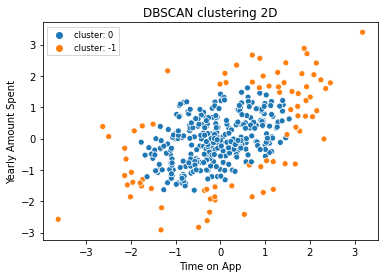

In [19]:
X = data_stand.iloc[:,[1,4]].values

dbscan = DBSCAN(eps=0.3, min_samples=8)
clusters = dbscan.fit_predict(X)
labels = dbscan.labels_

sns.scatterplot(X[:,0], X[:,1], hue=["cluster: {}".format(i) for i in labels])
plt.xlabel("Time on App")
plt.ylabel("Yearly Amount Spent")
plt.title('DBSCAN clustering 2D' )
plt.legend(fancybox=False, fontsize='small')
plt.show()

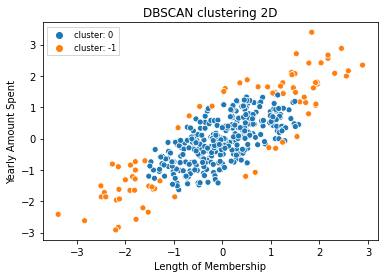

In [24]:
X = data_stand.iloc[:,[3,4]].values

dbscan = DBSCAN(eps=0.3, min_samples=10)
clusters = dbscan.fit_predict(X)
labels = dbscan.labels_

sns.scatterplot(X[:,0], X[:,1], hue=["cluster: {}".format(i) for i in labels])
plt.xlabel("Length of Membership")
plt.ylabel("Yearly Amount Spent")
plt.title('DBSCAN clustering 2D' )
plt.legend(fancybox=False, fontsize='small')
plt.show()

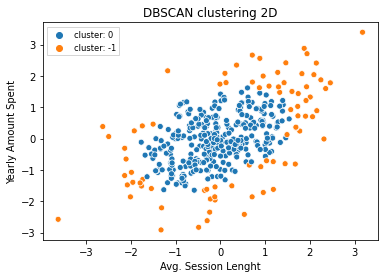

In [41]:
X = data_stand.iloc[:,[1,4]].values

dbscan = DBSCAN(eps=0.3, min_samples=8)
clusters = dbscan.fit_predict(X)
labels = dbscan.labels_

sns.scatterplot(X[:,0], X[:,1], hue=["cluster: {}".format(i) for i in labels])
plt.xlabel("Avg. Session Lenght")
plt.ylabel("Yearly Amount Spent")
plt.title('DBSCAN clustering 2D' )
plt.legend(fancybox=False, fontsize='small')
plt.show()

Continious data only

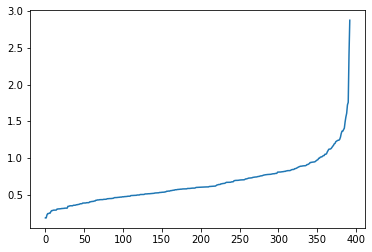

In [21]:
data_stand_num = data_stand[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_stand_num)
distances, indices = nbrs.kneighbors(data_stand_num)

distances = np.sort(distances, axis=0)

distances = distances[:,1]

plt.plot(distances)

In [13]:
dbscan = DBSCAN(eps=1.6, min_samples=10)
clusters = dbscan.fit_predict(data_stand_num)
print(clusters)

[ 0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0 -1  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0